In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv(r"Student_Performance(1).csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1,49.0,Yes,4.0,2.0,23.0
9996,7,64.0,Yes,8.0,5.0,58.0
9997,6,83.0,Yes,8.0,5.0,74.0
9998,9,97.0,Yes,7.0,0.0,95.0


In [3]:
df.isnull().sum()

Hours Studied                        0
Previous Scores                      7
Extracurricular Activities           6
Sleep Hours                          4
Sample Question Papers Practiced     5
Performance Index                   11
dtype: int64

In [4]:
df1_num=df.select_dtypes(include=['int64','float64'])
df1_num.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,9.0,1.0,91.0
1,4,82.0,4.0,2.0,65.0
2,8,51.0,7.0,2.0,45.0
3,5,52.0,5.0,2.0,36.0
4,7,75.0,8.0,5.0,66.0


<Axes: >

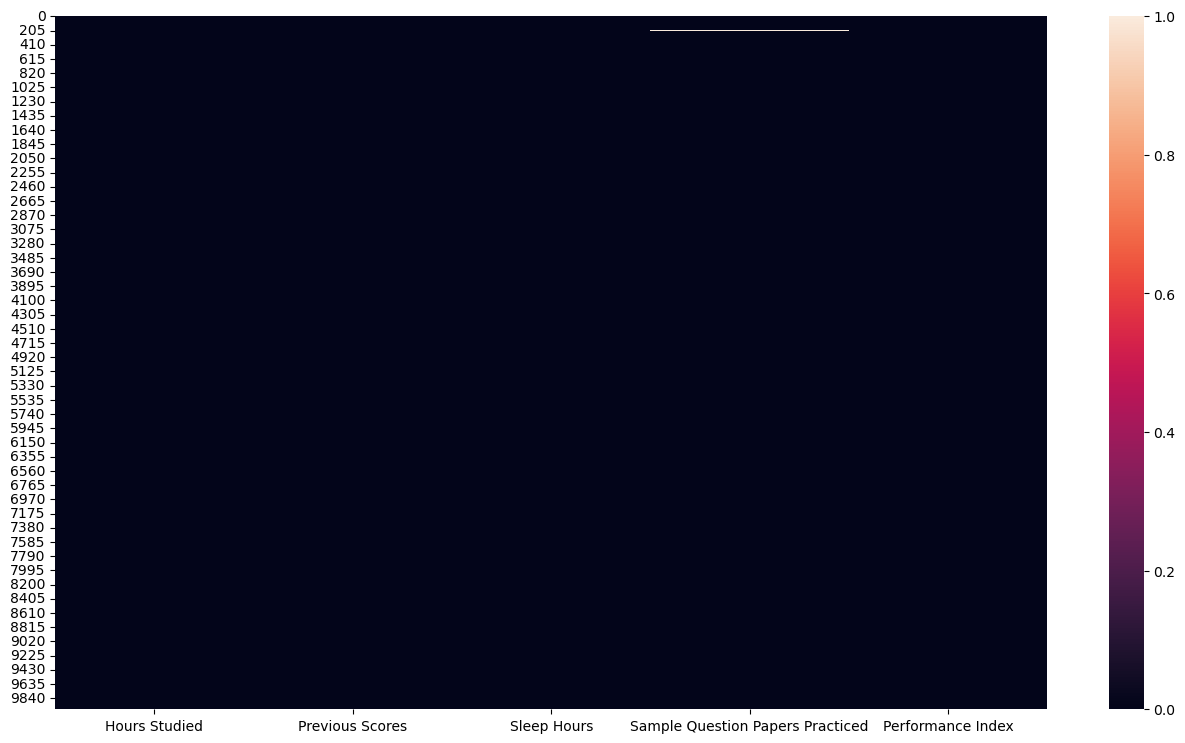

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df1_num.isnull())

In [6]:
df1_num[df1_num.isnull().any(axis=1)]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
204,7,49.0,7.0,NaN,38.0
205,3,40.0,9.0,NaN,18.0
206,7,71.0,7.0,NaN,66.0
207,9,69.0,4.0,NaN,65.0
208,4,47.0,5.0,NaN,27.0
209,1,60.0,7.0,4.0,NaN
210,2,61.0,6.0,6.0,NaN
211,1,57.0,9.0,2.0,NaN
212,5,41.0,8.0,4.0,NaN
213,5,87.0,5.0,3.0,NaN


In [7]:
missing_num_var = [var for var in df1_num.columns if df1_num[var].isnull().sum()>0]
missing_num_var

['Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

C:\Users\gajan\AppData\Local\Temp\ipykernel_24960\1763687542.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[var],bins=20,kde_kws={'linewidth':5,'color':'#DC143C'})
C:\Users\gajan\AppData\Local\Temp\ipykernel_24960\1763687542.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_nu

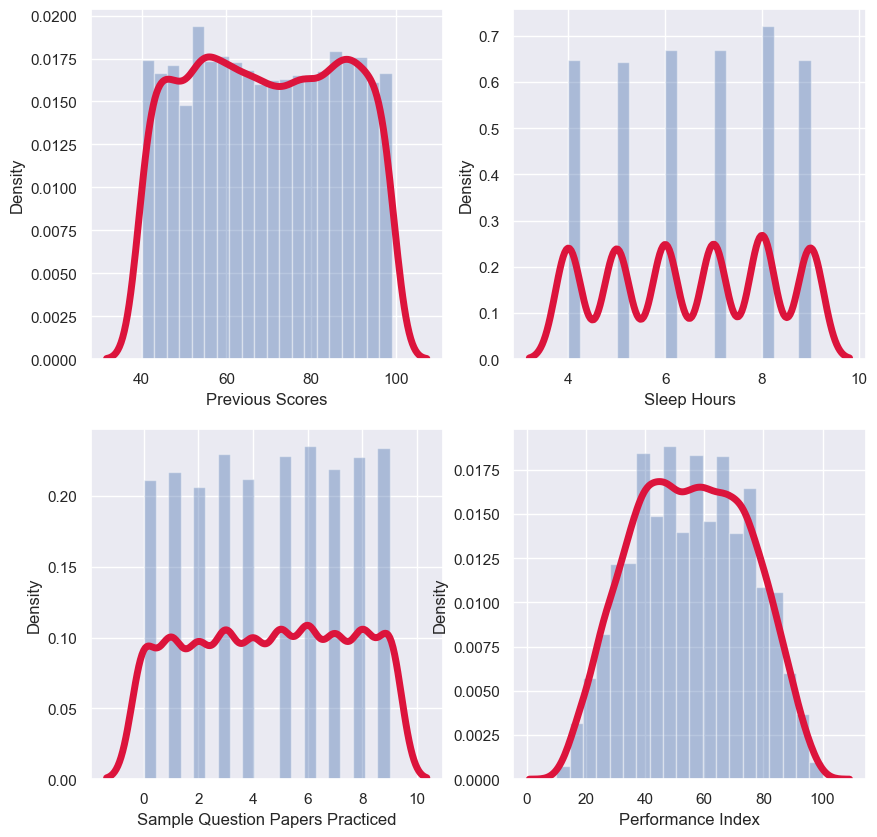

In [8]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df1_num[var],bins=20,kde_kws={'linewidth':5,'color':'#DC143C'})

# Missing value imputation

In [9]:
df2_num_mean = df1_num.fillna(df1_num.mean())
df2_num_mean.isnull().sum().sum()

0

C:\Users\gajan\AppData\Local\Temp\ipykernel_24960\3208689636.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[var],bins=20,kde_kws={'linewidth':8,'color':'red'},label='Orignal')
C:\Users\gajan\AppData\Local\Temp\ipykernel_24960\3208689636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

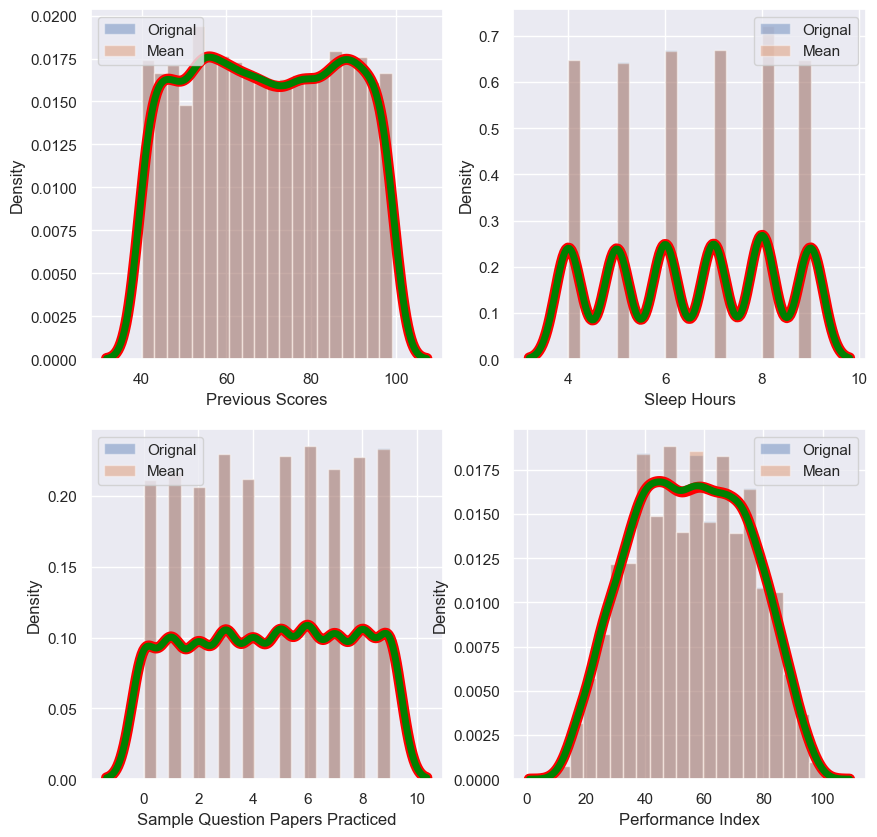

In [10]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df1_num[var],bins=20,kde_kws={'linewidth':8,'color':'red'},label='Orignal')
    sns.distplot(df2_num_mean[var],bins=20, kde_kws={'linewidth':5,'color':'green'},label="Mean")
    plt.legend()

In [11]:
df3_num_median = df1_num.fillna(df1_num.median())
df3_num_median.isnull().sum().sum()

0

C:\Users\gajan\AppData\Local\Temp\ipykernel_24960\2134353511.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_num[var],bins=20, hist=False,kde_kws={'linewidth':8,'color':'red'},label='Orignal')
C:\Users\gajan\AppData\Local\Temp\ipykernel_24960\2134353511.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

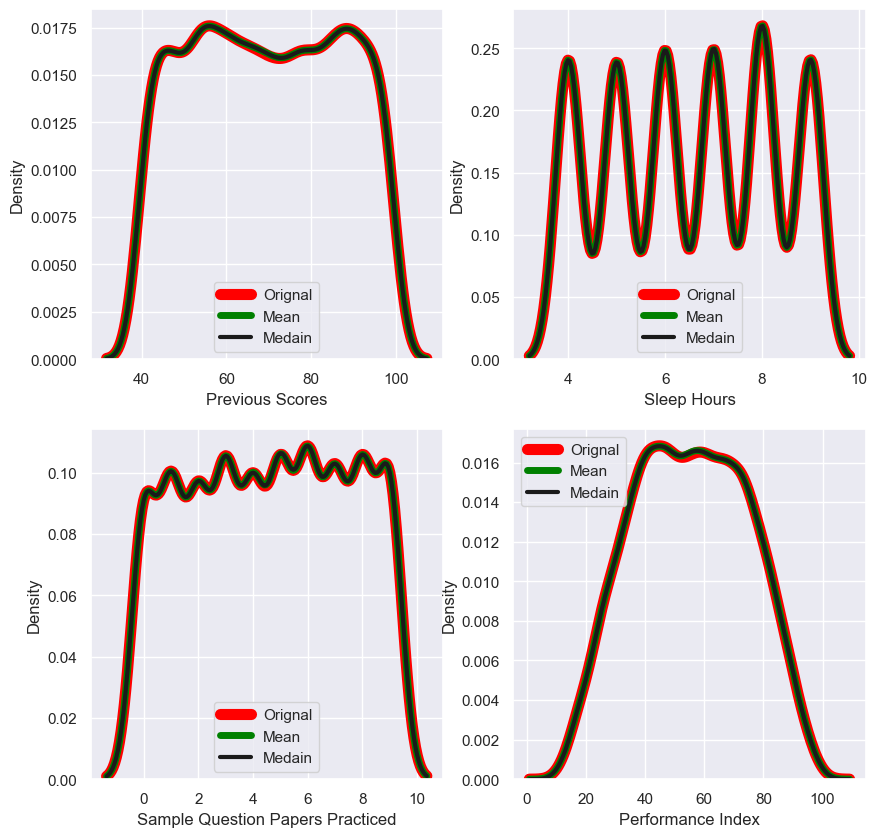

In [12]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df1_num[var],bins=20, hist=False,kde_kws={'linewidth':8,'color':'red'},label='Orignal')
    sns.distplot(df2_num_mean[var],bins=20,hist=False, kde_kws={'linewidth':5,'color':'green'},label="Mean")
    sns.distplot(df3_num_median[var],bins=20,hist=False, kde_kws={'linewidth':3,'color':'k'},label="Medain")
    plt.legend()

# To check outliers

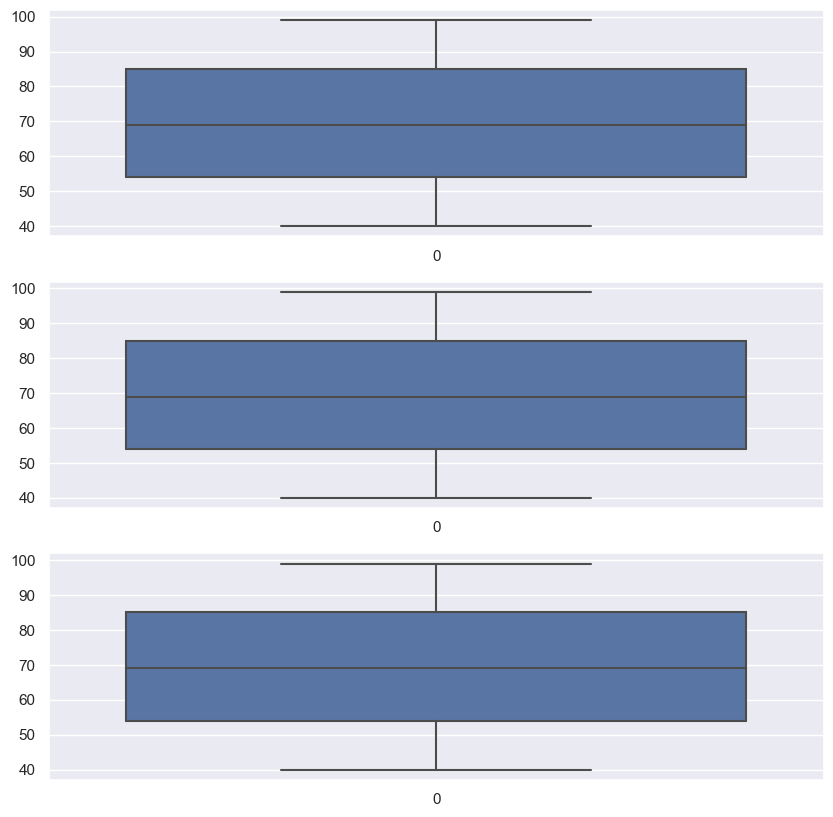

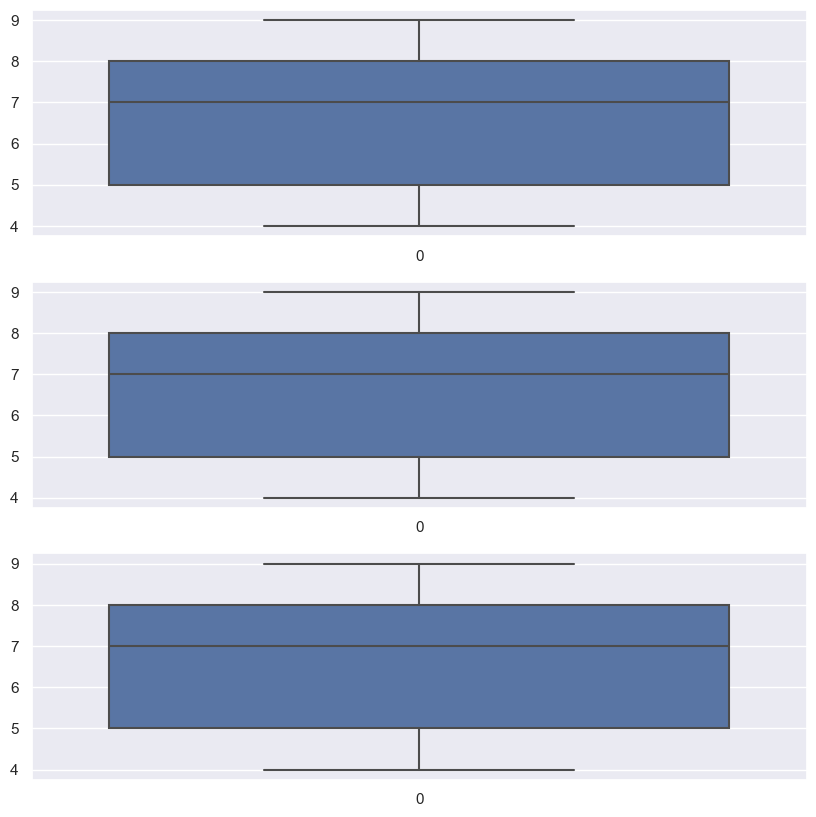

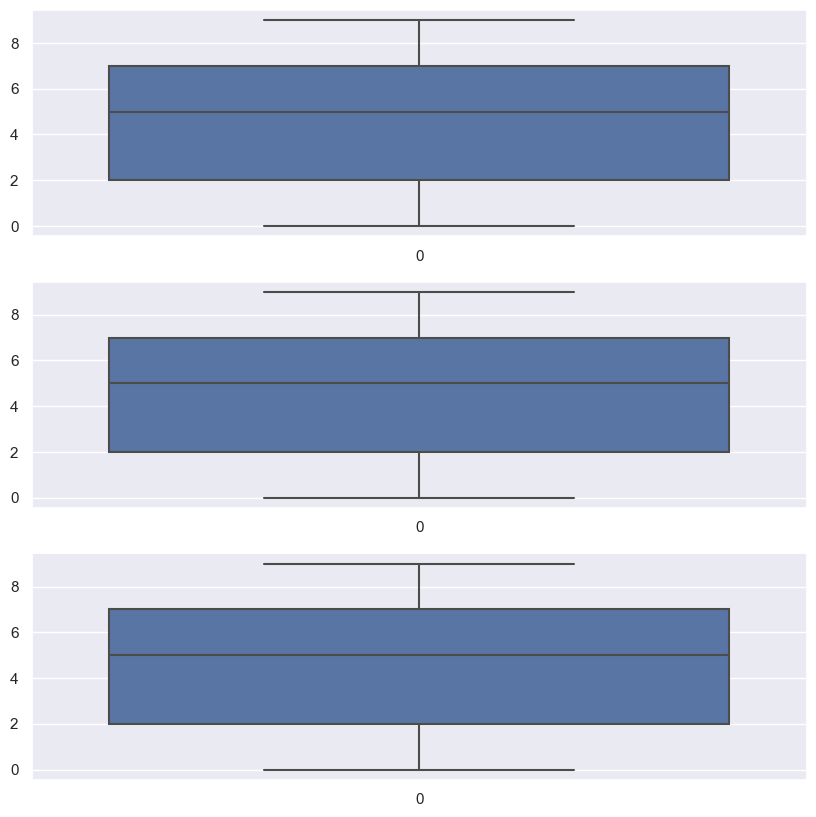

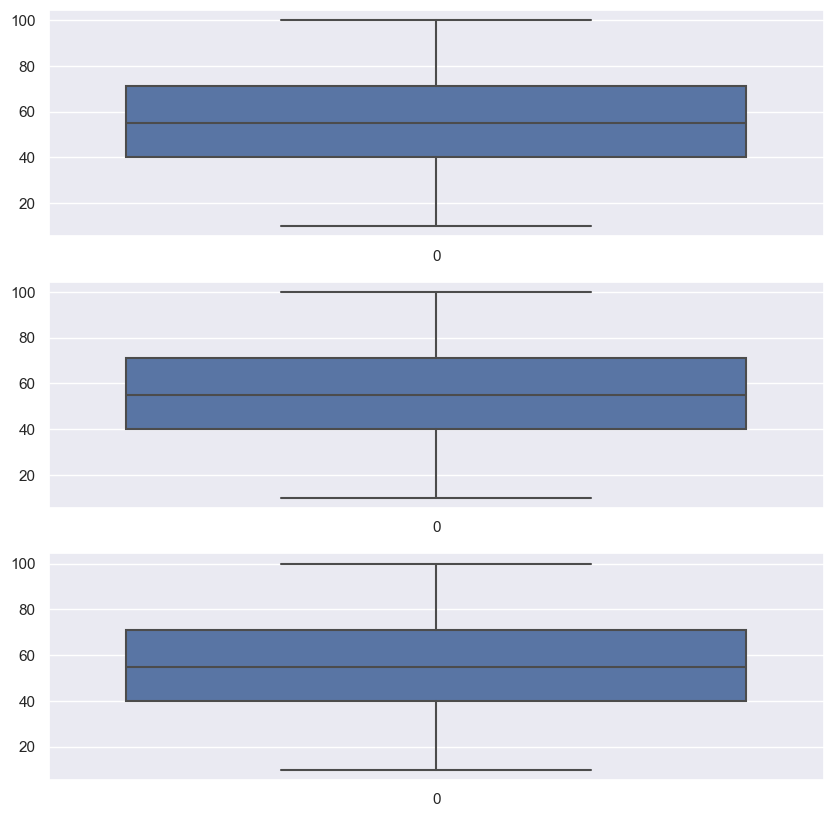

In [13]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df2_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(df3_num_median[var])

In [14]:
df_concat = pd.concat([df1_num[missing_num_var],df2_num_mean[missing_num_var]],axis=1)

In [15]:
df_concat.head(2)

,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,99.0,9.0,1.0,91.0,99.0,9.0,1.0,91.0
1,82.0,4.0,2.0,65.0,82.0,4.0,2.0,65.0


In [16]:
df.update(df2_num_mean)

df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0


In [17]:
EA_vars = df.select_dtypes(include='object')
EA_vars.head()

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No


In [18]:
EA_vars.isnull().sum()

Extracurricular Activities    6
dtype: int64

In [19]:
df4= EA_vars.isnull().mean()*100
df4

Extracurricular Activities    0.06
dtype: float64

In [20]:
EA_vars['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5049
Yes    4945
Name: count, dtype: int64

In [21]:
EA_vars['Extracurricular Activities'].mode()

0    No
Name: Extracurricular Activities, dtype: object

In [22]:
EA_vars['Extracurricular Activities'].fillna(EA_vars['Extracurricular Activities'].mode()[0])

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    Yes
9997    Yes
9998    Yes
9999     No
Name: Extracurricular Activities, Length: 10000, dtype: object

In [23]:
EA_vars['Extracurricular Activities'].fillna(EA_vars['Extracurricular Activities'].mode()[0]).value_counts()

Extracurricular Activities
No     5055
Yes    4945
Name: count, dtype: int64

In [24]:
EA_vars_copy= EA_vars.copy()

for var in EA_vars:
    EA_vars_copy[var].fillna(EA_vars[var].mode()[0],inplace=True)
    print(var,"=",EA_vars[var].mode()[0])

Extracurricular Activities = No


In [25]:
EA_vars_copy.isnull().sum().sum()

0

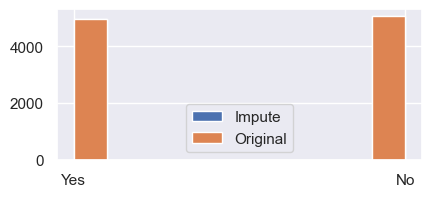

In [26]:
plt.figure(figsize=(16,9))
for i,var in enumerate(EA_vars):
    plt.subplot(4,3,i+1)
    plt.hist(EA_vars_copy[var],label="Impute")
    plt.hist(EA_vars[var].dropna(),label="Original")
    plt.legend()

In [27]:
df.update(EA_vars_copy)
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1,49.0,Yes,4.0,2.0,23.0
9996,7,64.0,Yes,8.0,5.0,58.0
9997,6,83.0,Yes,8.0,5.0,74.0
9998,9,97.0,Yes,7.0,0.0,95.0


In [28]:
df.update(EA_vars_copy)
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1,49.0,Yes,4.0,2.0,23.0
9996,7,64.0,Yes,8.0,5.0,58.0
9997,6,83.0,Yes,8.0,5.0,74.0
9998,9,97.0,Yes,7.0,0.0,95.0


<Axes: >

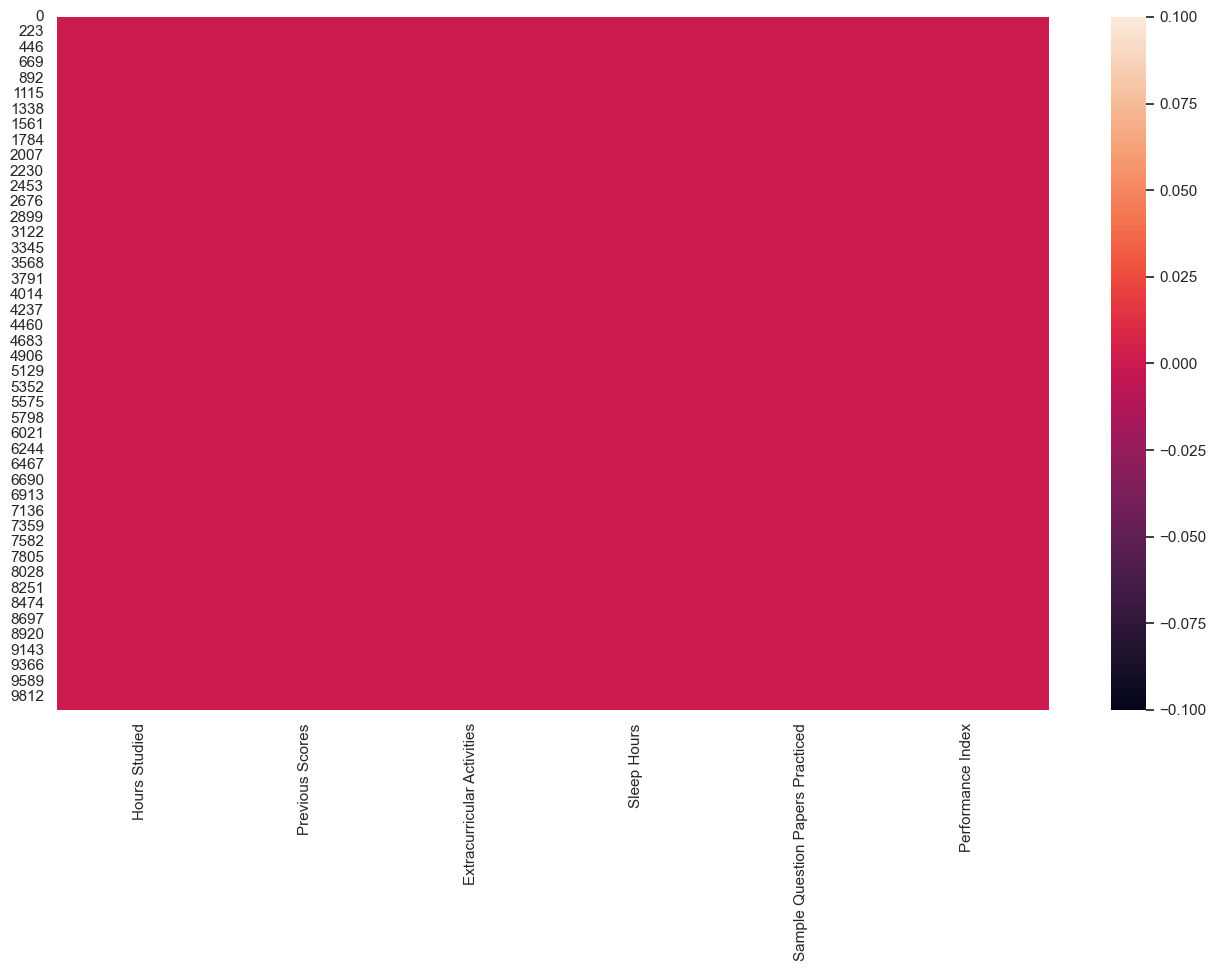

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# Onehot encoding

In [30]:
oh_enc = OneHotEncoder(sparse=False,drop="first")

In [31]:
oh_enc_arr = oh_enc.fit_transform(df[['Extracurricular Activities']])

oh_enc_arr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [32]:
marged= pd.DataFrame(oh_enc_arr, columns=['No'])
marged.head(2)

,No
0,1.0
1,0.0


In [33]:
df['Extracurricular Activities'] = marged[['No']].copy()

df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,1.0,9.0,1.0,91.0
1,4,82.0,0.0,4.0,2.0,65.0


In [34]:
df.update(df)
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,1.0,9.0,1.0,91.0
1,4,82.0,0.0,4.0,2.0,65.0


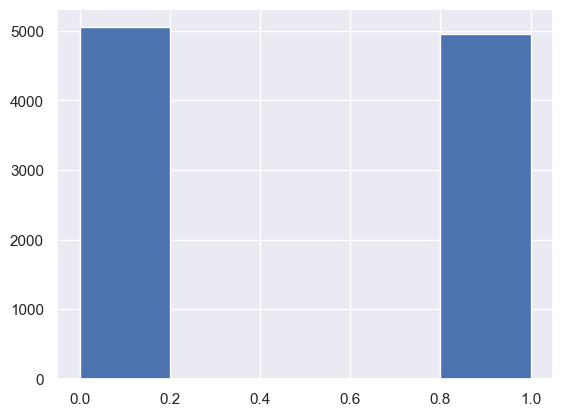

In [35]:
plt.hist(df['Extracurricular Activities'], bins=5)
plt.show()

In [36]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012540,0.004489,0.001399,0.017520,0.373180
Previous Scores,-0.012540,1.000000,0.008806,0.005658,0.008018,0.914604
Extracurricular Activities,0.004489,0.008806,1.000000,-0.023155,0.013244,0.024838
Sleep Hours,0.001399,0.005658,-0.023155,1.000000,0.003977,0.048465
Sample Question Papers Practiced,0.017520,0.008018,0.013244,0.003977,1.000000,0.042561
Performance Index,0.373180,0.914604,0.024838,0.048465,0.042561,1.000000


# Heatmap

Create the heatmap using the heatmap function of Seaborn

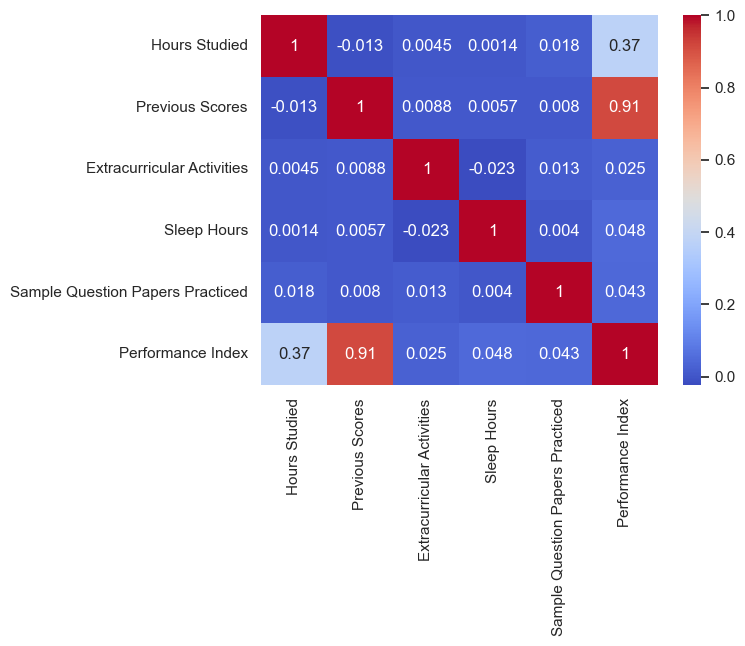

In [37]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

plt.show()

checking correlation between columns of dataset insurance

In [38]:
df.corr()['Performance Index'].sort_values()

Extracurricular Activities          0.024838
Sample Question Papers Practiced    0.042561
Sleep Hours                         0.048465
Hours Studied                       0.373180
Previous Scores                     0.914604
Performance Index                   1.000000
Name: Performance Index, dtype: float64

Setting the value for X and Y

In [39]:
x = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

Splitting the dataset

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

## standard scaler

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

# Multiple Linear Regression model

In [42]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

### Intercept and Coefficient

In [43]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -33.95551350579009
Coefficients:


[('Hours Studied', 2.839594874462826),
 ('Previous Scores', 1.0180718295660198),
 ('Extracurricular Activities', 0.620874233331032),
 ('Sleep Hours', 0.4844664443131602),
 ('Sample Question Papers Practiced', 0.18785419862840175)]

### Prediction of test set

In [44]:
y_pred_mlr= mlr.predict(x_test)

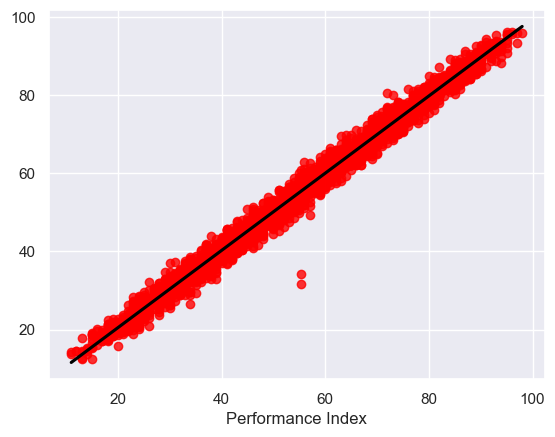

In [45]:
sns.regplot(x=y_test,y=y_pred_mlr,ci=None,color ='red',line_kws={"color": "black"});

### Actual value and the predicted value

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_mlr,'Difference':y_test-y_pred_mlr})
pred_df

,Actual Value,Predicted Value,Difference
8018,65.0,65.968795,-0.968795
9225,51.0,48.521361,2.478639
3854,35.0,36.178866,-1.178866
2029,97.0,93.266179,3.733821
3539,87.0,84.879334,2.120666
...,...,...,...
4208,69.0,68.299465,0.700535
5335,60.0,60.401554,-0.401554
2554,73.0,71.135060,1.864940
13,33.0,33.245006,-0.245006


### Model evaluation

In [47]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.73
Mean Absolute Error: 1.6572930292456922
Mean Square Error: 4.6199390936992195
Root Mean Square Error: 2.1494043578859747


### Predicting test set

In [48]:
Performance_Index= mlr.predict([[7,99,0,9,9]])
print("Multiple regression score :",Performance_Index)

Multiple regression score : [92.76164753]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Ridge Regression

In [49]:
rd = Ridge()
rd.fit(x_train,y_train)

Ridge()

### Intercept and Coefficient

In [50]:
print("Intercept: ",rd.intercept_)
print("Coefficients:")
list(zip(x,rd.coef_))

Intercept:  -33.95482865487114
Coefficients:


[('Hours Studied', 2.839535184942261),
 ('Previous Scores', 1.0180714153082455),
 ('Extracurricular Activities', 0.6205201983986159),
 ('Sleep Hours', 0.48443938657942637),
 ('Sample Question Papers Practiced', 0.18785290757280268)]

### Prediction of test set

In [51]:
y_pred_rd= rd.predict(x_test)

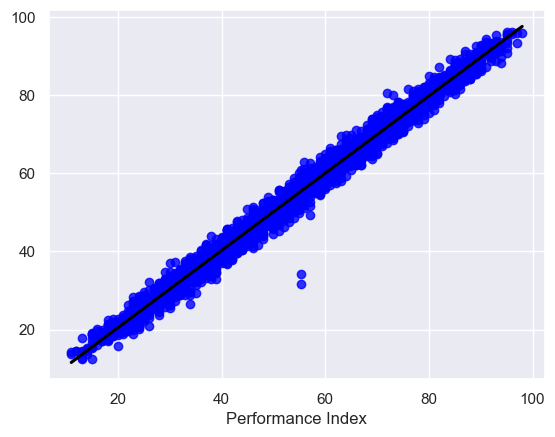

In [52]:
sns.regplot(x=y_test,y=y_pred_rd,ci=None,color ='blue',line_kws={"color": "black"});

### Actual value and the predicted value

In [53]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rd,'Difference':y_test-y_pred_rd})
pred_df

,Actual Value,Predicted Value,Difference
8018,65.0,65.968800,-0.968800
9225,51.0,48.521254,2.478746
3854,35.0,36.178977,-1.178977
2029,97.0,93.265845,3.734155
3539,87.0,84.879247,2.120753
...,...,...,...
4208,69.0,68.299649,0.700351
5335,60.0,60.401564,-0.401564
2554,73.0,71.135176,1.864824
13,33.0,33.245202,-0.245202


### Model evaluation

In [54]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rd)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rd)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rd))
print('R squared: {:.2f}'.format(rd.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.73
Mean Absolute Error: 1.65729783728983
Mean Square Error: 4.619950576376097
Root Mean Square Error: 2.149407029014304


### Predicting test set

In [55]:
Performance_Index= rd.predict([[7,99,0,9,9]])
print('Rigde score:',Performance_Index)

Rigde score: [92.7616184]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# Lasso Regression

In [56]:
ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

### Intercept and Coefficient

In [74]:
print("Intercept: ", ls.intercept_)
print("Coefficients:")
list(zip(x, ls.coef_))

Intercept:  -29.830505012979067
Coefficients:


[('Hours Studied', 2.6934179901874735),
 ('Previous Scores', 1.0146152686120418),
 ('Extracurricular Activities', 0.0),
 ('Sleep Hours', 0.12981804708456907),
 ('Sample Question Papers Practiced', 0.07019598232134078)]

### Prediction of test set

In [57]:
y_pred_ls= ls.predict(x_test)

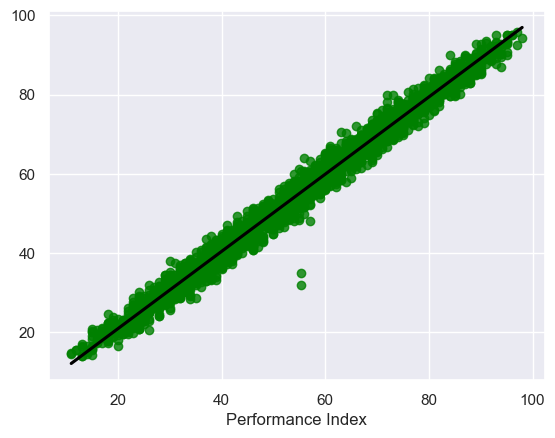

In [58]:
sns.regplot(x=y_test,y=y_pred_ls,ci=None,color ='green',line_kws={"color": "black"});

### Actual value and the predicted value

In [59]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_ls,'Difference':y_test-y_pred_ls})
pred_df

,Actual Value,Predicted Value,Difference
8018,65.0,66.042559,-1.042559
9225,51.0,49.301822,1.698178
3854,35.0,35.152859,-0.152859
2029,97.0,92.429989,4.570011
3539,87.0,84.081883,2.918117
...,...,...,...
4208,69.0,67.770962,1.229038
5335,60.0,59.690708,0.309292
2554,73.0,72.150846,0.849154
13,33.0,34.676585,-1.676585


### Model evaluation

In [60]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_ls)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_ls)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls))
print('R squared: {:.2f}'.format(ls.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.54
Mean Absolute Error: 1.799047876240796
Mean Square Error: 5.397592720000989
Root Mean Square Error: 2.323271985799551


### Predicting test set

In [61]:
Performance_Index= ls.predict([[7,99,0,9,9]])
print("Lasso score",Performance_Index)

Lasso score [91.27045878]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


# Random forest regression

In [62]:
rf=RandomForestRegressor(n_estimators=100,criterion='squared_error')
rf.fit(x_train,y_train)

RandomForestRegressor()

### Prediction of test set

In [63]:
y_pred_rf=rf.predict(x_test)

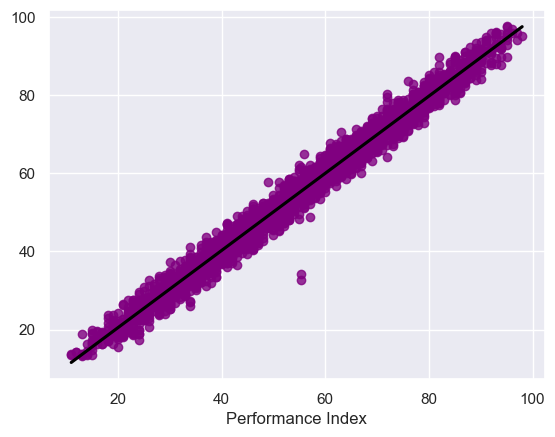

In [64]:
sns.regplot(x=y_test,y=y_pred_rf,ci=None,color ='purple',line_kws={"color": "black"});

### Actual value and the predicted value

In [65]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rd,'Difference':y_test-y_pred_rd})
pred_df

,Actual Value,Predicted Value,Difference
8018,65.0,65.968800,-0.968800
9225,51.0,48.521254,2.478746
3854,35.0,36.178977,-1.178977
2029,97.0,93.265845,3.734155
3539,87.0,84.879247,2.120753
...,...,...,...
4208,69.0,68.299649,0.700351
5335,60.0,60.401564,-0.401564
2554,73.0,71.135176,1.864824
13,33.0,33.245202,-0.245202


### Model evaluation

In [66]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rf)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('R squared: {:.2f}'.format(rf.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.31
Mean Absolute Error: 1.886943873422465
Mean Square Error: 5.969697321271558
Root Mean Square Error: 2.443296404710562


### Predicting test set

In [67]:
Performance_Index= rf.predict([[7,99,0,9,9]])
print("Random forest score:",Performance_Index)

Random forest score: [92.83]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Decision tree regression

In [68]:
dt=DecisionTreeRegressor(criterion='squared_error')
dt.fit(x_train,y_train)

DecisionTreeRegressor()

### Prediction of test set

In [69]:
y_pred_dt=dt.predict(x_test)

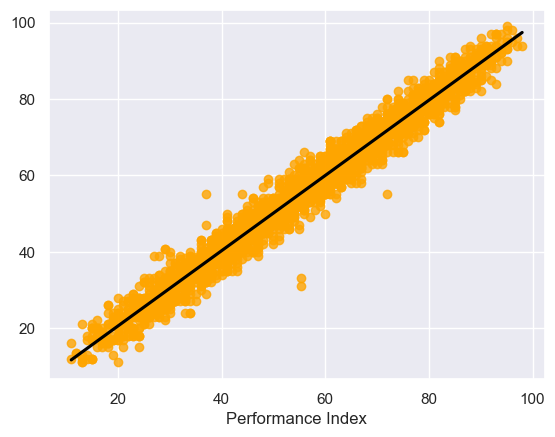

In [70]:
sns.regplot(x=y_test,y=y_pred_dt,ci=None,color ='orange',line_kws={"color": "black"});

### Actual value and the predicted value

In [71]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_dt,'Difference':y_test-y_pred_dt})
pred_df

,Actual Value,Predicted Value,Difference
8018,65.0,66.0,-1.0
9225,51.0,50.0,1.0
3854,35.0,33.0,2.0
2029,97.0,94.0,3.0
3539,87.0,82.0,5.0
...,...,...,...
4208,69.0,64.0,5.0
5335,60.0,58.0,2.0
2554,73.0,72.0,1.0
13,33.0,27.0,6.0


### Model evaluation

In [72]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_dt)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_dt)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
print('R squared: {:.2f}'.format(dt.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.09
Mean Absolute Error: 2.4868480717678336
Mean Square Error: 10.413022797572353
Root Mean Square Error: 3.2269215666905127


### Predicting test set

In [73]:
Performance_Index= dt.predict([[7,99,0,9,9]])
print("Decision tree score:",Performance_Index)

Decision tree score: [95.]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
